# TBA Final Project


In [1]:
!pip install serpapi

In [2]:
!pip install requests beautifulsoup4 pandas serpapi


In [3]:
!pip install google-search-results

## The following code searches Google Scholar for articles on "carbon emission of AI," extracts the titles, descriptions, and URLs from the search results, and saves this information to a CSV file using serpapi

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from serpapi import GoogleSearch
import warnings

# Suppress warnings about character decoding issues
warnings.filterwarnings('ignore', message='Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.')

# Your SerpApi API key
SERP_API_KEY = "561000b36d2cdcf66599ce0a20085e60198061b2e242b228a4e64420845da11a"

# Define search parameters for Google Search
params = {
    "api_key": SERP_API_KEY,
    "engine": "google",
    "q": "carbon emission and data centers of AI",
    "hl": "en",
    "num": 10000
}

# Perform the search
try:
    search = GoogleSearch(params)
    results = search.get_dict()
    organic_results = results.get('organic_results', [])
except Exception as e:
    print(f"Error performing search: {e}")
    organic_results = []

# Extract URLs from search results
urls = [result.get('link') for result in organic_results if 'link' in result]

# Prepare a list to hold all articles
all_articles = []

# Extract data from each URL
for url in urls:
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        title_tag = soup.find('title')
        title = title_tag.get_text(strip=True) if title_tag else 'No Title'
        
        description_tag = soup.find('meta', attrs={'name': 'description'}) or soup.find('p')
        description = description_tag['content'] if description_tag and description_tag.has_attr('content') else description_tag.get_text(strip=True) if description_tag else 'No Description'

        article_info = {
            'title': title,
            'description': description,
            'url': url
        }
        all_articles.append(article_info)
    except requests.exceptions.RequestException:
        pass  # Suppress the error message and continue
    except Exception:
        pass  # Suppress the error message and continue

# Convert the list of articles to a DataFrame
df = pd.DataFrame(all_articles)

# Check if DataFrame is empty
if df.empty:
    print("No articles were successfully extracted.")
else:
    # Display the DataFrame
    print(df.head(20))

    # Save the DataFrame to a CSV file
    df.to_csv('carbon_emission_ai_articles.csv', index=False)
    print("Data saved to carbon_emission_ai_articles.csv")


                                                title  \
0   AI’s Growing Carbon Footprint – State of the P...   
1   Another Big Question About AI: Its Carbon Foot...   
2   AI's looming climate cost: Energy demand surge...   
3   Microsoft’s AI Push Imperils Climate Goal as C...   
4   Three Ways for Colocation Data Centers to Cut ...   
5   AI, Data Centers, and Energy Use: The Path to ...   
6   The Role of AI in Developing Green Data Center...   
7   AI Datacenter Capacity, Energy Consumption, an...   
8   Microsoft's Emissions and Water Use Shoot Up a...   
9   AI is poised to drive 160% increase in data ce...   
10  Sustainable AI: Addressing the Carbon Footprin...   
11  AI’s Carbon Emissions Are About to Be a Proble...   
12  AI's carbon footprint - how does the popularit...   
13  AI emissions are fueling a new doomerism. This...   
14  Artificial Intelligence Is Booming—So Is Its C...   
15  Energy Efficiency Using AI for Green Data Cent...   
16  Real-time Carbon Footprint 

In [3]:
print(df.head(80))

                                                title  \
0   AI’s Growing Carbon Footprint – State of the P...   
1   Another Big Question About AI: Its Carbon Foot...   
2   AI's looming climate cost: Energy demand surge...   
3   Microsoft’s AI Push Imperils Climate Goal as C...   
4   Three Ways for Colocation Data Centers to Cut ...   
..                                                ...   
70  Starting with data centers, Carbon Relay is sl...   
71  Navigating Your Company’s Growing AI Carbon Fo...   
72  Carbon Footprint of AI and Deep Learning | Lea...   
73  Microsoft’s emissions soar by 30%: Why is it b...   
74  Carbon Footprint of Data Centers & Data Storag...   

                                          description  \
0   Artificial intelligence has the potential to d...   
1   It’s “an accelerant for everything,” potential...   
2   PALO ALTO, California -- Artificial intelligen...   
3   Eye-opening sustainability report comes as tec...   
4   Discover three effective w

### The code imports the NLTK library to download English stopwords

In [5]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'yourself', 'your', 'hasn', 'mightn', 'yourselves', 'what', 'him', 'into', 'do', 'where', 'in', 'other', 'most', 'as', 'so', 'very', 'have', 'again', 'me', "mustn't", 'he', 'these', 'out', "don't", 'whom', "aren't", 'had', 'below', 'each', "hadn't", 've', 'up', 'shouldn', 'how', "doesn't", 'ain', 'over', 'theirs', "she's", 'before', "couldn't", 'same', 'mustn', 'has', 'does', 'didn', "weren't", 'y', 'why', "you'll", 'is', 'did', "needn't", "haven't", 'from', 'are', 'doing', 'those', "isn't", 'few', 'between', 'no', 'the', 't', 'needn', 'who', 'own', 'above', 'to', 's', "you'd", 'can', 'll', 'for', 'that', "you've", 'd', 'her', 'aren', "should've", 'any', 'both', "mightn't", 'than', 'we', 'will', "hasn't", 'their', 'yours', 'hers', 'during', 'shan', 'don', "you're", 'was', 'with', 'isn', "shouldn't", 'i', 'his', "that'll", 'some', 'down', 'be', 'more', 'itself', 'about', 'all', 'an', 'they', 'nor', 'such', "shan't", "wasn't", 'doesn', "wouldn't", 'having', 'of', 'should', 'but', 'mysel

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tsaiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### The following code extracts and returns a list of alphanumeric tokens containing at least one letter from a given text.

In [7]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)


### The function remove_stop takes a list of tokens and returns a new list excluding any tokens that are stopwords.

In [ ]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]


### The following function applies a sequence of text processing functions from the pipeline to a given text.

In [11]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


In [13]:
df['tokens'] = df['title'].apply(prepare, pipeline=pipeline)

### The following code creates a frequency DataFrame of tokens from the 'tokens' column of a DataFrame df counts the occurrences of each token and displays the top 10 most frequent tokens.

In [15]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, 
orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
ai,64
data,43
carbon,36
|,25
centers,24
footprint,23
emissions,16
energy,15
climate,11


## Word Cloud #1
### The following code generates and displays a word cloud from token frequencies 

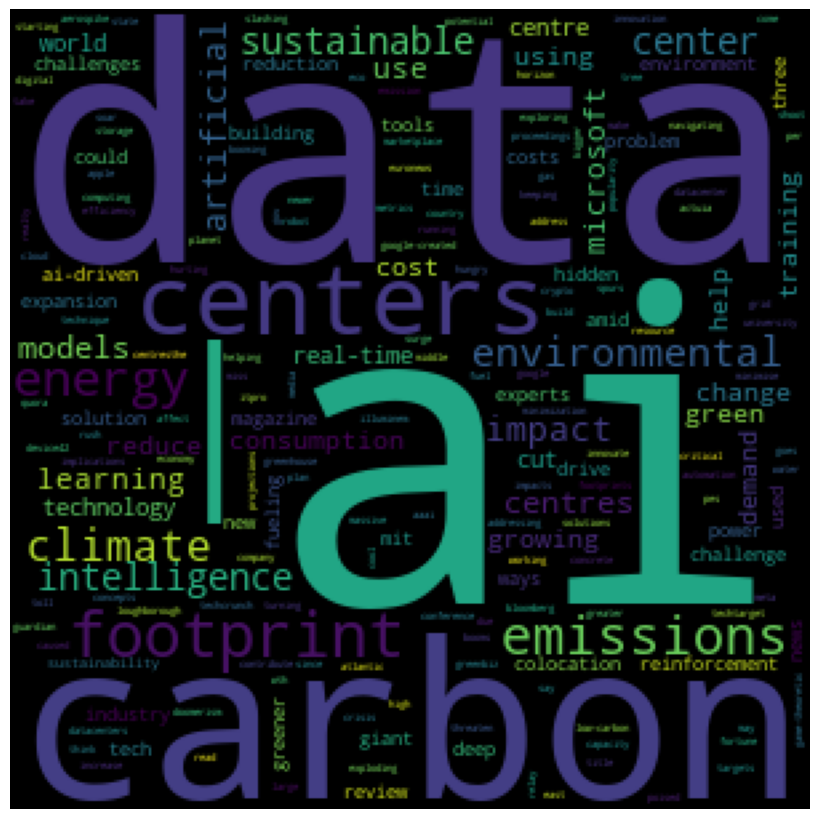

In [17]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='black', width = 300, height=300, 
margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Word Cloud #2
### The following code generates and displays a word cloud with vibrant colors in the shape of a mask image, using text data from a DataFrame

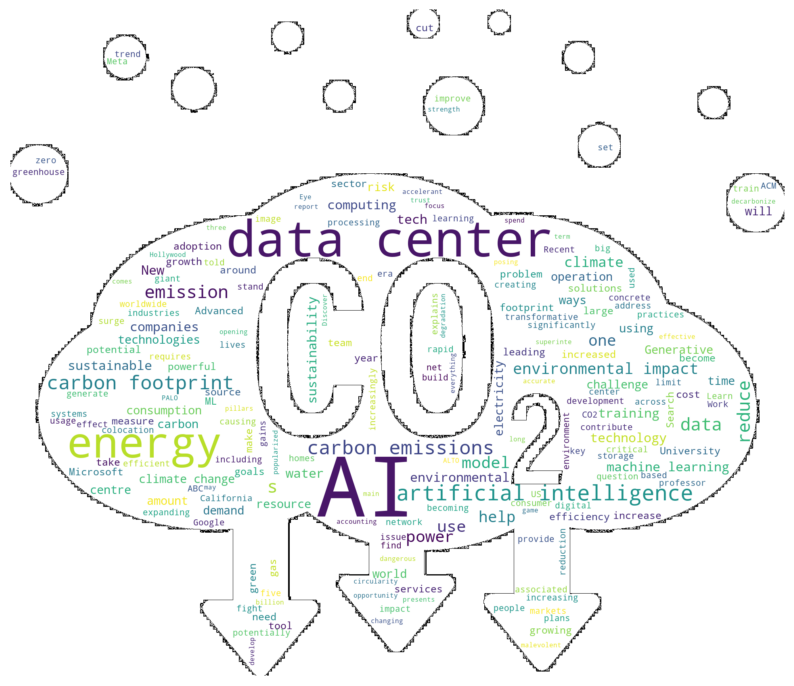

In [19]:
import numpy as np
from PIL import Image, ImageOps
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df['description'] contains text data

# Combine all descriptions into a single string
text = " ".join(description for description in df.description)

# Load mask image
mask_image = np.array(Image.open('sh1.jpg'))

# Convert mask image to have an ash color background
ash_color = (169, 169, 169)  # Define ash color
mask_with_ash_bg = Image.new("RGB", (mask_image.shape[1], mask_image.shape[0]), ash_color)
mask_with_ash_bg.paste(Image.fromarray(mask_image), (0, 0), Image.fromarray(mask_image))

# Convert the image to grayscale for the mask
mask_with_ash_bg = mask_with_ash_bg.convert("L")
mask_with_ash_bg = np.array(mask_with_ash_bg)

# Generate word cloud with vibrant colors
wordcloud = WordCloud(
    background_color='white',  # Background color for areas outside the mask
    mask=mask_image,
    contour_color='black',  # Optional: contour color for the shape
    contour_width=1,  # Optional: contour width for the shape
    colormap='viridis'
).generate(text)

# Display the word cloud
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### The following code defines a function that calculates the inverse document frequency (IDF) of tokens in a DataFrame

In [22]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
 # count tokens
    counter = Counter()
    df[column].map(update)
# create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

### The following code calculates the TF-IDF score for each token by multiplying its frequency with its IDF value and displays the top entries in the  DataFrame.

In [25]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()


,freq,tfidf
token,,
ai,64,22.850887
data,43,31.330172
carbon,36,30.022890
|,25,32.049847
centers,24,29.746423


# Sentiment Analysis

In [28]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

### The following code defines functions to calculate subjectivity and polarity using TextBlob

In [30]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['title'].apply(getSubjectivity)
df['Polarity'] = df['title'].apply(getPolarity)

#Now display data
df.head()

,title,description,url,tokens,Subjectivity,Polarity
0,AI’s Growing Carbon Footprint – State of the P...,Artificial intelligence has the potential to d...,https://news.climate.columbia.edu/2023/06/09/a...,"[ai, growing, carbon, footprint, state, planet]",0.0,0.0
1,Another Big Question About AI: Its Carbon Foot...,"It’s “an accelerant for everything,” potential...",https://www.motherjones.com/environment/2024/0...,"[another, big, question, ai, carbon, footprint...",0.1,0.0
2,AI's looming climate cost: Energy demand surge...,"PALO ALTO, California -- Artificial intelligen...",https://asia.nikkei.com/Spotlight/The-Big-Stor...,"[ai, looming, climate, cost, energy, demand, s...",0.1,-0.1
3,Microsoft’s AI Push Imperils Climate Goal as C...,Eye-opening sustainability report comes as tec...,https://www.datacenterknowledge.com/sustainabi...,"[microsoft, ai, push, imperils, climate, goal,...",0.0,0.0
4,Three Ways for Colocation Data Centers to Cut ...,Discover three effective ways for colocation d...,https://blog.se.com/sustainability/2024/05/23/...,"[three, ways, colocation, data, centers, cut, ...",0.0,0.0


### The following code defines a function to categorize polarity scores as "Negative," "Neutral," or "Positive," applies this function to the 'Polarity' column to create a new 'Insight' column

In [32]:
# Function to categorize polarity
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "neutral"
    else:
        return "Positive"
    
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(10)

,title,description,url,tokens,Subjectivity,Polarity,Insight
0,AI’s Growing Carbon Footprint – State of the P...,Artificial intelligence has the potential to d...,https://news.climate.columbia.edu/2023/06/09/a...,"[ai, growing, carbon, footprint, state, planet]",0.0,0.0,neutral
1,Another Big Question About AI: Its Carbon Foot...,"It’s “an accelerant for everything,” potential...",https://www.motherjones.com/environment/2024/0...,"[another, big, question, ai, carbon, footprint...",0.1,0.0,neutral
2,AI's looming climate cost: Energy demand surge...,"PALO ALTO, California -- Artificial intelligen...",https://asia.nikkei.com/Spotlight/The-Big-Stor...,"[ai, looming, climate, cost, energy, demand, s...",0.1,-0.1,Negative
3,Microsoft’s AI Push Imperils Climate Goal as C...,Eye-opening sustainability report comes as tec...,https://www.datacenterknowledge.com/sustainabi...,"[microsoft, ai, push, imperils, climate, goal,...",0.0,0.0,neutral
4,Three Ways for Colocation Data Centers to Cut ...,Discover three effective ways for colocation d...,https://blog.se.com/sustainability/2024/05/23/...,"[three, ways, colocation, data, centers, cut, ...",0.0,0.0,neutral
5,"AI, Data Centers, and Energy Use: The Path to ...",The increasing use of AI and data centers is l...,https://www.informationweek.com/sustainability...,"[ai, data, centers, energy, use, path, sustain...",0.0,0.0,neutral
6,The Role of AI in Developing Green Data Center...,"In an era where sustainability is the focus, g...",https://www.dataversity.net/the-role-of-ai-in-...,"[role, ai, developing, green, data, centers, d...",0.3,-0.2,Negative
7,"AI Datacenter Capacity, Energy Consumption, an...","IDC examines consumer markets by devices, appl...",https://www.idc.com/getdoc.jsp?containerId=US5...,"[ai, datacenter, capacity, energy, consumption...",0.0,0.0,neutral
8,Microsoft's Emissions and Water Use Shoot Up a...,Microsoft's water use and carbon emissions hav...,https://futurism.com/the-byte/microsoft-emissi...,"[microsoft, emissions, water, use, shoot, goes...",0.0,0.0,neutral
9,AI is poised to drive 160% increase in data ce...,,https://www.goldmansachs.com/intelligence/page...,"[ai, poised, drive, increase, data, center, po...",0.1,-0.1,Negative


### The code plots a bar chart showing the count of different sentiment scores from the "Insight" column of the DataFrame, with the chart titled "carbon emission Sentiment Score".

In [35]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### The following code plots a bar chart showing the count of different sentiment scores related to carbon emissions

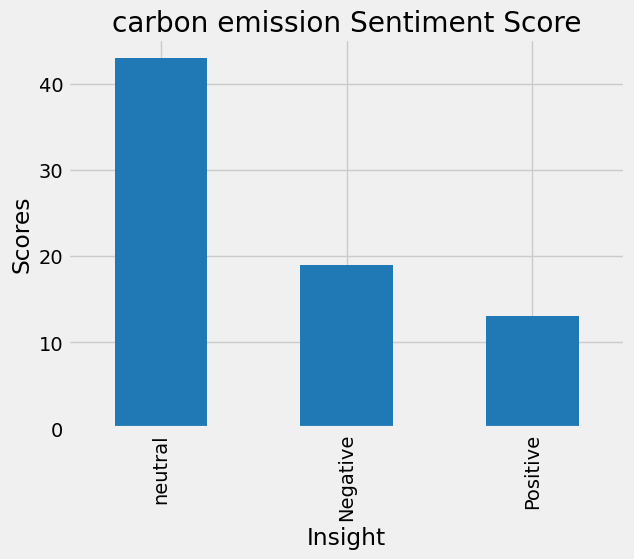

In [37]:
#Plot the values count of sentiment
plt.title("carbon emission Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Topic Modeling

In [40]:
!pip install pyLDAvis

In [42]:
import gensim
from gensim import corpora
import pandas as pd
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

### The following code creates a dictionary and corpus from tokenized text, filters extreme words, applies LDA to find topics, prints the top topics, visualizes the results using pyLDAvis, saves the visualization as an HTML file, and opens it in a browser.

In [43]:
dictionary = corpora.Dictionary(df['tokens'])

# Filter out words that occur in less than 3 documents or more than 50% of the documents.
dictionary.filter_extremes(no_below=3, no_above=0.5)

# Create a corpus object
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Apply LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Visualization using pyLDAvis
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

# Save the visualization as an HTML file
pyLDAvis.save_html(lda_display, 'lda_visualization2.html')

# Open the HTML file in a browser
import webbrowser
webbrowser.open('lda_visualization2.html')

(0, '0.162*"centers" + 0.112*"footprint" + 0.107*"carbon" + 0.093*"sustainable" + 0.080*"climate"')
(1, '0.196*"emissions" + 0.118*"|" + 0.114*"carbon" + 0.083*"centers" + 0.077*"microsoft"')
(2, '0.283*"carbon" + 0.278*"footprint" + 0.056*"learning" + 0.056*"artificial" + 0.056*"intelligence"')
(3, '0.161*"energy" + 0.123*"environmental" + 0.096*"impact" + 0.083*"centres" + 0.056*"reduce"')
(4, '0.152*"|" + 0.107*"centers" + 0.092*"carbon" + 0.088*"growing" + 0.068*"models"')


True

In [69]:
# Display the visualization
pyLDAvis.display(lda_display)
